# Data Cleansing
#### Name: Rohit Sanjay Tapas

Environment: Python 3 and Jupyter notebook

Libraries used: 
* pandas (for analysing the data)
* datetime (for handling date and time data)
* networkx (for using dijkstras algorithm to find shortest paths)
* matplotlib (for plotting the data for EDA)
* folium (plotting coordinates on interactive maps)
* KNeighborsClassifier (for clustering)
* LinearRegression (To perform linear regression)
* seaborn (To plot scatterplots and residualplots)


## 1. Introduction
The dataset provided contains data of Uber Rides.

The description of the data is as follows:
* id - Unique ID for the journey
* Uber Type - Whether the ride was Uberpool,X or Black
* Origin Region - Region from where journey started
* Destination Region - Region where journey ended
* Origin, Destination Latitudes and Longitudes - Geograpical coordinates of start point and end point of the journeys
* Journey Distance - Distance from start point to end point of journey.
* Departure Date, Time - Time and date of commencement of journey.
* Travel Time - Time duration taken to reach the destination.
* Arrival Time - Time of arrival to destination.
* Fare - Fare of the journey

This program performs various Graphical and non Graphical EDA to observe and fix errors in the dataset.

There are 3 datasets namely:
* Dirty Data : 
Dirty data has errors which have to be fixed using various Graphical and non Graphical EDA.
* Missing Data : 
Missing data has missing values which need to be imputed using other information provided.
* Outliers : 
Outliers data contains outliers which have to be identified and removed.


## 2.  Import libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import folium
import math
import seaborn as sns
edges = pd.read_csv('edges.csv')                     #reading edges file
nodes = pd.read_csv('nodes.csv')                     #reading nodes file
df1 = pd.read_csv('29812135_dirty_data.csv')         #reading dirty data file

In [3]:
df1.head()

,Unnamed: 0,Type check,Uber Type,Unnamed: 3,Origin Region,Destination Region,balah,Origin Latitude,Origin Longitude,Destination Latitude,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,ID5170952514,False,2.0,"6,",6.0,2.0,False,-37.790818,144.985793,-37.822629,...,1414,5521.6,True,4.307007e+09,1454.16,1454.16,False,01/01/2018,11:29:37,0.0
1,ID1584290422,False,0.0,"3,",6.0,5.0,False,-37.790797,144.985865,-37.801738,...,1712,6137.0,True,4.307007e+09,1712.22,1712.22,True,19/05/2018,16:53:46,0.0
2,ID3879065535,False,1.0,"5,",6.0,5.0,False,-37.773803,144.983647,-37.807269,...,3052,10258.0,True,2.455255e+09,3052.26,3052.26,True,09/06/2018,19:02:18,0.0
3,ID1690604694,False,0.0,"1,",4.0,3.0,False,-37.815756,145.012611,-37.819726,...,1175,4654.7,True,3.721154e+09,1175.64,1175.64,True,19/07/2018,21:15:35,0.0
4,ID1887535802,False,0.0,"1,",3.0,8.0,False,-37.809839,144.989120,-37.815834,...,1599,5106.0,True,2.372885e+09,1599.66,1599.66,True,17/05/2018,19:57:56,0.0


## 3. Analyze and Fix Problems

### 3.1 Uber Type:

* We know that Uber Type can only have values of 0,1 or 2. Hence, any value which is not 0,1 or 2 is an error.
* Therefore, we check for these errors

In [252]:
df1[df1['Uber Type'] > 2]                 #Display with uber type more than 2

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
119,ID1359146153,3,7,4,-37.861835,144.905716,-37.811623,145.012099,12092.0,2018-02-15,06:51:14,3834.48,7:55:08,12.90
125,ID1968295858,3,9,4,-38.110916,144.654173,-37.810707,144.995932,46522.0,2018-05-08,20:12:35,11141.70,23:18:16,27.92


In [253]:
df1.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5170952514,2,6,2,-37.790818,144.985793,-37.822629,144.951916,5521.6,2018-01-01,11:05:23,1414.38,11:28:57,119.61
1,ID1584290422,0,6,5,-37.790797,144.985865,-37.801738,144.931133,6137.0,2018-05-19,16:25:14,1712.22,16:53:46,16.82
2,ID3879065535,1,6,5,-37.773803,144.983647,-37.807269,144.939173,10258.0,2018-06-09,18:11:26,3052.26,19:02:18,23.28
3,ID1690604694,0,4,3,-37.815756,145.012611,-37.819726,144.969655,4654.7,2018-07-19,20:56:00,1175.64,21:15:35,10.41
4,ID1887535802,0,3,8,-37.809839,144.989120,-37.815834,145.046450,5106.0,2018-05-17,19:31:17,1599.66,19:57:56,11.92


By observing the above dataframe, We can concur that:

Uber type 0 has ID starting with 1

Uber type 1 has ID starting with 3

Uber type 2 has ID starting with 5

Fixing the errors that were found in Uber Type:

In [254]:
i = 0
for each in df1['Uber Type']:
    if each > 2:
        if df1['Unnamed: 0'][i][2] == '1':              #update for Uber type 0
            df1['Uber Type'][i] = 0
        if df1['Unnamed: 0'][i][2] == '3':              #update for Uber type 1
            df1['Uber Type'][i] = 1
        if df1['Unnamed: 0'][i][2] == '5':              #update for Uber type 2
            df1['Uber Type'][i] = 2
    i = i + 1

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [255]:
df1[df1['Uber Type'] > 2]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


### 3.2 Latitudes and Longitudes:
* Coordinates have been taken from the nodes.csv file.
* Hence we analyse the nodes.csv file.

In [256]:
nodes.head()

,Unnamed: 0,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


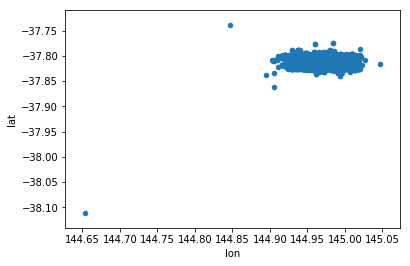

In [257]:
nodes.plot.scatter(y='lat', x='lon')                 #scatterplot of all coordinates

From this plot, we can concur that:
* All latitudes are negative values.
* All longitudes are positive values.

Hence we check for positive latitudes and negative longitudes in our data. If found, we fix them.

* Destination Latitude: 
* Checking if any value is positive

In [258]:
df1[df1['Destination Latitude']>0]           #find positive latitudes

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
51,ID3260400816,1,7,3,-37.861835,144.905716,37.821458,144.983876,8993.0,2018-04-17,14:46:24,2969.82,15:35:53,19.39
52,ID1927950735,0,7,9,-37.861835,144.905716,38.110916,144.654173,50797.0,2018-07-26,13:07:34,13173.36,16:47:07,32.07
53,ID3146695327,1,1,2,-37.807236,144.959469,37.820679,144.948641,2315.0,2018-06-21,22:32:50,579.96,22:42:29,18.30
59,ID5918237543,2,3,1,-37.820674,144.984587,37.804987,144.972398,2654.0,2018-01-18,01:50:58,646.50,2:01:44,78.30
64,ID1707219823,0,9,3,-38.110916,144.654173,37.812915,144.985728,45552.0,2018-05-06,05:57:38,10959.24,9:00:17,34.11


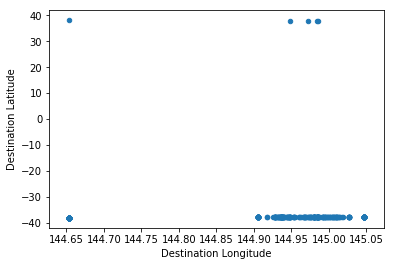

In [259]:
df1.plot.scatter(y='Destination Latitude', x='Destination Longitude')     #find posistive latitudes by scatterplot

In [260]:
df1['Destination Latitude'] = abs(df1['Destination Latitude']) * -1   #updating the dirty latitudes

* After correction: 

In [261]:
df1[df1['Destination Latitude'] > 0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


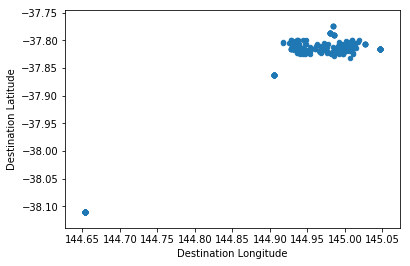

In [262]:
df1.plot.scatter(y='Destination Latitude', x='Destination Longitude')    #checking if we are right by plotting

* Origin Latitude: 
* Check if Origin Latitude is positive

In [263]:
df1[df1['Origin Latitude']>0]               #check if latitude positive

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
40,ID3587053919,1,6,3,37.790797,144.985865,-37.823705,144.997052,4675.0,2018-03-16,16:36:09,1318.98,16:58:07,14.89
44,ID1493119178,0,9,8,38.110916,144.654173,-37.815834,145.046450,51032.0,2018-03-18,16:11:47,12681.06,19:43:08,34.43
46,ID3359226331,1,4,2,37.809829,144.993824,-37.819767,144.948487,4648.0,2018-07-20,00:35:15,1112.10,0:53:47,20.03
47,ID3275041974,1,3,4,37.818964,145.003743,-37.811626,145.006758,988.0,2018-04-17,23:01:20,254.22,23:05:34,15.95
49,ID5992829391,2,8,5,37.807202,145.026637,-37.804926,144.927214,9505.0,2018-01-19,10:17:53,2441.16,10:58:34,198.57


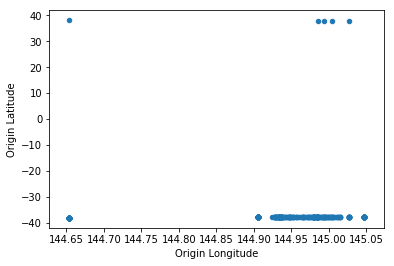

In [264]:
df1.plot.scatter(y='Origin Latitude', x='Origin Longitude')     #check if latitude positive

In [265]:
df1['Origin Latitude'] = abs(df1['Origin Latitude']) * -1        #updating dirty latitude

* After Correction: 

In [266]:
df1[df1['Origin Latitude'] > 0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


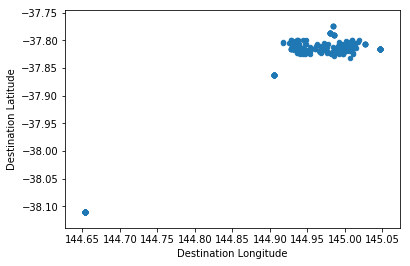

In [267]:
df1.plot.scatter(y='Destination Latitude', x='Destination Longitude')      #checking if we are correct

### 3.3 Dates:

Here we, check if the dates are in a uniform format i.e. DD-MM-YYYY

We also check if the months have the correct dates eg. February can't have more than 28 days, June can't have more than 30 days etc.

In [269]:
i = 0
for each in df1['Departure Date']:
    each = str(each).split('-')
    if int(each[1]) > 12 and int(each[2]) < 12:             #if months and days are inter changed
        print(each)

    if int(each[1]) == 2 and int(each[2]) >28:              # check for February
        print(each) 

        
    if int(each[1]) == 4 and int(each[2]) >30:              #Check for April
        print(each)
        
        
    if int(each[1]) == 6 and int(each[2]) >30:              #Check for June
        print(each)
    i = i+1
    
    
#df1['Clean_date'] = pd.Series(clean_date)

['2018', '18', '07']
['2018', '27', '02']
['2018', '20', '05']
['2018', '17', '01']
['2018', '06', '31']
['2018', '02', '30']
['2018', '04', '31']
['2018', '06', '31']
['2018', '04', '31']
['2018', '04', '31']
['2018', '06', '31']
['2018', '02', '30']
['2018', '04', '31']
['2018', '06', '31']


In [270]:
#clean_date = []
i = 0
for each in df1['Departure Date']:
    #each = each.split('-')
    each = str(each).split('-')
    if int(each[1]) > 12 and int(each[2]) < 12:               #swap the interchanged months and dates
        print(each)
        temp = each[1]
        each[1] = each[2]
        each[2] = temp
    if int(each[1]) == 2 and int(each[2]) >28:                #update the wrong dates
        print(each) 
        each[2] = 28
         
    if int(each[1]) == 4 and int(each[2]) >30:               #update the wrong dates
        print(each)
        each[2] = 30
        
        
    if int(each[1]) == 6 and int(each[2]) >30:                #update the wrong dates
        print(each)
        each[2] = 30
        
    #clean_date.append(str(each[0]) + '-' + str(each[1]) + '-' + str(each[2]))
    date = (str(each[0]) + '-' + str(each[1]) + '-' + str(each[2]))
    #print(date)
    df1.at[i,'Departure Date'] = date
    i = i+1
    
    
#df1['Clean_date'] = pd.Series(clean_date)

['2018', '18', '07']
['2018', '27', '02']
['2018', '20', '05']
['2018', '17', '01']
['2018', '06', '31']
['2018', '02', '30']
['2018', '04', '31']
['2018', '06', '31']
['2018', '04', '31']
['2018', '04', '31']
['2018', '06', '31']
['2018', '02', '30']
['2018', '04', '31']
['2018', '06', '31']


### 3.4 Travel Distance:

Here we check if the total distance travlled in the journey is accurate.

In [272]:
G = nx.Graph()                               #initialize graph
for i, row in edges.iterrows():
    G.add_edge(row['u'],row['v'], distance=row['distance(m)'])       #add nodes to graph

In [273]:
for counter, series in df1.iterrows():
    origin_lat = series['Origin Latitude']                 
    origin_lon = series['Origin Longitude']
    dest_lat = series['Destination Latitude']
    dest_lon = series['Destination Longitude']
    
    u = 0
    v = 0
    
    for i, row in nodes.iterrows():                             #check if coordinates in dirty data match with coordinates in nodes data
        if row['lat'] == origin_lat and row['lon'] == origin_lon:                
            u = row['Unnamed: 0']
        if row['lat'] == dest_lat and row['lon'] == dest_lon:
            v = row['Unnamed: 0']
            
        if not u == 0 and not v == 0:                           #calculate new distance by using Dijkstras Algorithm
            distance = nx.dijkstra_path_length(G,u,v,'distance')  
            if not distance == series['Journey Distance(m)']:
                df1['Journey Distance(m)'][counter] = distance   #update the incorreect distances in our data
                print('UberID- ',series['Unnamed: 0'], 'New Distance-', distance, 'Original Distance: ', series['Journey Distance(m)'])

                
            u = 0
            v = 0


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


UberID-  ID5170952514 New Distance- 5523.0 Original Distance:  5521.6
UberID-  ID1690604694 New Distance- 4651.0 Original Distance:  4654.7
UberID-  ID3349699275 New Distance- 43296.0 Original Distance:  43304.0
UberID-  ID3446692236 New Distance- 47033.0 Original Distance:  47042.1


* As the distances have changed, the travel time will also change.

Moreover, we have to check if the other travel times are correct.

In [274]:
df1['Calculated tt']=''
df1['Calculated tt'] = pd.to_timedelta(df1['Arrival Time'])-pd.to_timedelta(df1['Departure Time'])   #calculate given arrival time
df1['Calculated tt'] = df1['Calculated tt'].astype(str).str.extract('days (.*?)\.')   #using regex to filter out days
df1['Calculated tt'] = df1['Calculated tt'].str.replace('+'," ")

In [275]:
def convert_time(secs):              #function to convert time to seconds to hours mins and seconds
    secs = secs % (24*3600)
    hour = secs//3600
    mins = secs//60
    secs%=60
    
    return '%d:%02d:%02d' % (hour,mins,secs)

In [276]:
ttlist = []                           #convert travel time to hour mins and seconds
seconds= df1['Travel Time(s)']
for each in seconds:
    time = convert_time(each)
    ttlist.append(time)
df1['Calculated tt new'] = ''
df1['Calculated tt new'] = pd.Series(ttlist)

In [277]:
wrong_time =[]                        #if the given and found times are inconsistent, add to list
b = 0
for i,rows in df1.iterrows():
    if pd.to_datetime(rows['Calculated tt'],errors='coerce')!=pd.to_datetime(rows['Calculated tt new'],errors='coerce'):
        wrong_time.append(tuple([[i,rows]]))

In [278]:
ttt = []                                  #find out new travel times for rows found above
for each in wrong_time:
    for x,y in each:

        origin_lat=y[4]
        origin_lon=y[5]
        destination_lat=y[6]
        destination_lon=y[7]

        u=0
        v=0

        for i,series in nodes.iterrows():
            if series['lat']==origin_lat and series['lon']==origin_lon:
                u=series['Unnamed: 0']
            if series['lat']==destination_lat and series['lon']==destination_lon:
                v=series['Unnamed: 0']

            if not u==0 and not v==0:                                   #find out travel time by using Dijkstras Algorithm
                path=nx.dijkstra_path(G,u,v,'distance')
                tt = 0
                for k in range(len(path)-1):
                    tt = tt + (edges[((edges.u==path[k]) & (edges.v== path[k+1])) | ((edges.v==path[k]) & (edges.u== path[k+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[k]) & (edges.v== path[k+1])) | ((edges.v==path[k]) & (edges.u== path[k+1]))]['speed(km/h)'].values[0] * 1000)
                    u=0
                    v=0  
                #print(tt , j , i , k)
                ttt.append(tuple([[x,round(tt,2)]]))
                #df1.at[j,'Travel Time(s)'] = tt
            

In [279]:
for i,rows in df1.iterrows():
    for each in ttt:
        for j,k in each:
            if i==j:
                df1['Travel Time(s)'][i] = k          #update the new travel time to our dataset

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [280]:
df1 = df1.drop(columns='Calculated tt')               #drop the unwanted columns
df1 = df1.drop(columns='Calculated tt new')

### 3.5 Arrival Time:

* We know that in a journey, Departure time should be before the Arrival Time.

Hence, we check if all Departure times are before the Arrival times. If they are not, we swap them.


In [282]:
arr_t = pd.to_timedelta(df1['Arrival Time'])            #convert data to time format
dep_t = pd.to_timedelta(df1['Departure Time'])

We check if the difference between departure time and arrival time is more than 20 hours as it is logical that an Uber trip can not be 20 hours long.

If it is more than 20 hours, the values are swapped.

In [283]:
i = 0
for x,y in zip(dep_t,arr_t):                    #check if arrival time is before departure time
    each = y-x
    each = each.seconds//3600
    if each > 19:
        temp = dep_t[i]
        dep_t[i] = arr_t[i]
        arr_t[i] = temp
    i = i+1

df1['Arrival Time'] = arr_t
df1['Departure Time'] = dep_t
df1['Arrival Time'] = df1['Arrival Time'].astype(str).str.extract('days (.*?)\.')
df1['Departure Time'] = df1['Departure Time'].astype(str).str.extract('days (.*?)\.')

In [284]:
travel_t = pd.to_timedelta(df1['Travel Time(s)'] * 1000000000)            #convert to hour mins seconds

In [285]:
depa_t = pd.to_timedelta(df1['Departure Time'])

In [287]:
df1['Arrival Time'] = arrival_t

In [ ]:
arrival_t = []                                 #find arrival time and add to our dataset
for x,y in zip(travel_t,depa_t):
    each = (x+y)
    each1 = str(pd.to_timedelta(each.seconds, unit='s'))
    each1 = each1.split()
    print(each1[2])
    arrival_t.append(each1[2])

### 3.6 Regions:

* Origin and Destination Regions have been given in the dataset.
* Coordinates belong to a specific region.
* Hence to check for errors we have to plot all the coordinates on a map

In [289]:
coord_origin = []
for x,y in zip(df1['Origin Latitude'],df1['Origin Longitude']):   #get origin coordinates
    each = x,y
    coord_origin.append(each)

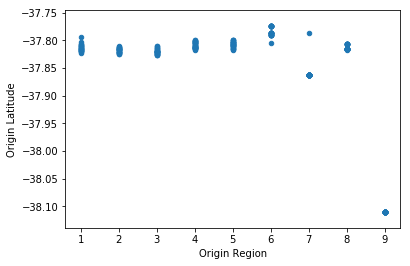

In [290]:
df1.plot.scatter(y='Origin Latitude', x= 'Origin Region')   #plot of regions and coordinates.

In the above plot we can see inconistency in the regions and coordinates

In [291]:
region_origin = []                       #adding all regions to lists
region_dest = []
for each in df1['Origin Region']:
    region_origin.append(each)

for eacha in df1['Destination Region']:
    region_dest.append(eacha)

In [292]:
coord_dest = []                                                           #getting destination coordinates
for x,y in zip(df1['Destination Latitude'],df1['Destination Longitude']):
    each = x,y
    coord_dest.append(each)

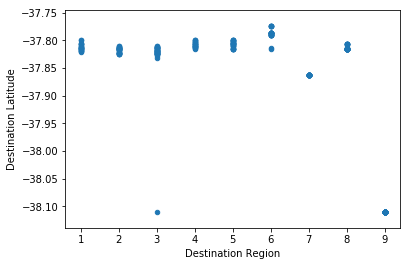

In [293]:
df1.plot.scatter(y='Destination Latitude', x= 'Destination Region')      #plot of regions and destination coordinates

In the above plot we can see inconsistencies in the regions and coordinates

Predicting the regions for Origin regions using KNN

In [294]:
X = coord_origin                       #Using KNN to predict the regions based on given data for Origin
y = region_origin
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X, y)
pred_region_origin = neigh.predict(X)

Predicting the regions for Destination regions

In [295]:
A = coord_dest                      #Using KNN to predict the regions based on given data for Destination
b = region_dest
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(A, b)
pred_region_dest = neigh.predict(A)

In [296]:
df1['clusters_dest'] = pred_region_dest   #adding to our dataframe

In [297]:
df1['clusters_origin'] = pred_region_origin  #adding to our dataframe

Scatter Plot for Predicted Destination Latitudes and Destination Clusters

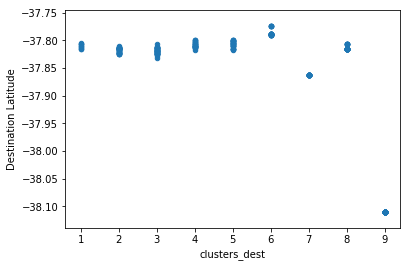

In [298]:
df1.plot.scatter(y='Destination Latitude', x= 'clusters_dest')   #plotting predicted regions for destination

Scatter Plot for Predicted Origin Latitudes and Origin Clusters

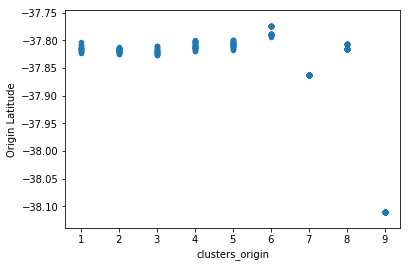

In [299]:
df1.plot.scatter(y='Origin Latitude', x= 'clusters_origin')      #plotting predicted regions for origin

Mapping the Original Origin Regions:

In [300]:
i = 0                                             #adding each region to its corresponding lists
r_1=[]
r_2=[]
r_3=[]
r_4=[]
r_5=[]
r_6=[]
r_7=[]
r_8=[]
r_9=[]
for each in coord_origin:
    if df1['Origin Region'][i] == 1:
        r_1.append(each)
    elif df1['Origin Region'][i] == 2:
        r_2.append(each)
    elif df1['Origin Region'][i] == 3:
        r_3.append(each)
    elif df1['Origin Region'][i] == 4:
        r_4.append(each)
    elif df1['Origin Region'][i] == 5:
        r_5.append(each)
    elif df1['Origin Region'][i] == 6:
        r_6.append(each)
    elif df1['Origin Region'][i] == 7:
        r_7.append(each)
    elif df1['Origin Region'][i] == 8:
        r_8.append(each)
    elif df1['Origin Region'][i] == 9:
        r_9.append(each)
    i = i+1

In [301]:
map_1 = folium.Map(location=[-37.7908183, 144.9857929], zoom_start=12)                 #plotting the coordinates on the map
for point in range(0, len(r_1)):
    folium.Marker(r_1[point],icon=folium.Icon(color='pink'),popup='1').add_to(map_1)
for point in range(0, len(r_2)):
    folium.Marker(r_2[point],icon=folium.Icon(color='green'),popup='2').add_to(map_1)
for point in range(0, len(r_3)):
    folium.Marker(r_3[point],icon=folium.Icon(color='blue'),popup='3').add_to(map_1)
for point in range(0, len(r_4)):
    folium.Marker(r_4[point],icon=folium.Icon(color='darkgreen'),popup='4').add_to(map_1)
for point in range(0, len(r_5)):
    folium.Marker(r_5[point],icon=folium.Icon(color='maroon'),popup='5').add_to(map_1)
for point in range(0, len(r_6)):
    folium.Marker(r_6[point],icon=folium.Icon(color='white'),popup='6').add_to(map_1)
for point in range(0, len(r_7)):
    folium.Marker(r_7[point],icon=folium.Icon(color='black'),popup='7').add_to(map_1)
for point in range(0, len(r_8)):
    folium.Marker(r_8[point],icon=folium.Icon(color='darkblue'),popup='8').add_to(map_1)
for point in range(0, len(r_9)):
    folium.Marker(r_9[point],icon=folium.Icon(color='purple'),popup='9').add_to(map_1)

We can check the region by clicking on the markers

In [302]:
map_1

In the above map, we can see that some regions are overlapping. 

This means that the region numbers allocated to those coordinates are wrong.

Hence, we fix them using K Nearest Neighbours algorithm.


Mapping the corrected Origin Regions:

In [303]:
i = 0                                      #mapping for corrected regions
r_1=[]
r_2=[]
r_3=[]
r_4=[]
r_5=[]
r_6=[]
r_7=[]
r_8=[]
r_9=[]
for each in coord_origin:
    if df1['clusters_origin'][i] == 0:
        r_1.append(each)
    elif df1['clusters_origin'][i] == 1:
        r_2.append(each)
    elif df1['clusters_origin'][i] == 2:
        r_3.append(each)
    elif df1['clusters_origin'][i] == 3:
        r_4.append(each)
    elif df1['clusters_origin'][i] == 4:
        r_5.append(each)
    elif df1['clusters_origin'][i] == 5:
        r_6.append(each)
    elif df1['clusters_origin'][i] == 6:
        r_7.append(each)
    elif df1['clusters_origin'][i] == 7:
        r_8.append(each)
    elif df1['clusters_origin'][i] == 8:
        r_9.append(each)
    i = i+1

In [304]:
map_2 = folium.Map(location=[-37.7908183, 144.9857929], zoom_start=12)                  #mapping for corrected regions
for point in range(0, len(r_1)):
    folium.Marker(r_1[point],icon=folium.Icon(color='pink'),popup='0').add_to(map_2)
for point in range(0, len(r_2)):
    folium.Marker(r_2[point],icon=folium.Icon(color='green'),popup='1').add_to(map_2)
for point in range(0, len(r_3)):
    folium.Marker(r_3[point],icon=folium.Icon(color='blue'),popup='2').add_to(map_2)
for point in range(0, len(r_4)):
    folium.Marker(r_4[point],icon=folium.Icon(color='darkgreen'),popup='3').add_to(map_2)
for point in range(0, len(r_5)):
    folium.Marker(r_5[point],icon=folium.Icon(color='maroon'),popup='4').add_to(map_2)
for point in range(0, len(r_6)):
    folium.Marker(r_6[point],icon=folium.Icon(color='white'),popup='5').add_to(map_2)
for point in range(0, len(r_7)):
    folium.Marker(r_7[point],icon=folium.Icon(color='black'),popup='6').add_to(map_2)
for point in range(0, len(r_8)):
    folium.Marker(r_8[point],icon=folium.Icon(color='darkblue'),popup='7').add_to(map_2)
for point in range(0, len(r_9)):
    folium.Marker(r_9[point],icon=folium.Icon(color='purple'),popup='8').add_to(map_2)

In [305]:
map_2

Mapping the Original Destination Regions:

In [306]:
i = 0
r_1=[]                                               #mapping for original destination regions
r_2=[]
r_3=[]
r_4=[]
r_5=[]
r_6=[]
r_7=[]
r_8=[]
r_9=[]
for each in coord_dest:
    if df1['Destination Region'][i] == 1:
        r_1.append(each)
    elif df1['Destination Region'][i] == 2:
        r_2.append(each)
    elif df1['Destination Region'][i] == 3:
        r_3.append(each)
    elif df1['Destination Region'][i] == 4:
        r_4.append(each)
    elif df1['Destination Region'][i] == 5:
        r_5.append(each)
    elif df1['Destination Region'][i] == 6:
        r_6.append(each)
    elif df1['Destination Region'][i] == 7:
        r_7.append(each)
    elif df1['Destination Region'][i] == 8:
        r_8.append(each)
    elif df1['Destination Region'][i] == 9:
        r_9.append(each)
    i = i+1

In [307]:
map_3 = folium.Map(location=[-37.7908183, 144.9857929], zoom_start=12)                   #mapping for original destination regions
for point in range(0, len(r_1)):
    folium.Marker(r_1[point],icon=folium.Icon(color='pink'),popup='1').add_to(map_3)
for point in range(0, len(r_2)):
    folium.Marker(r_2[point],icon=folium.Icon(color='green'),popup='2').add_to(map_3)
for point in range(0, len(r_3)):
    folium.Marker(r_3[point],icon=folium.Icon(color='blue'),popup='3').add_to(map_3)
for point in range(0, len(r_4)):
    folium.Marker(r_4[point],icon=folium.Icon(color='darkgreen'),popup='4').add_to(map_3)
for point in range(0, len(r_5)):
    folium.Marker(r_5[point],icon=folium.Icon(color='maroon'),popup='5').add_to(map_3)
for point in range(0, len(r_6)):
    folium.Marker(r_6[point],icon=folium.Icon(color='white'),popup='6').add_to(map_3)
for point in range(0, len(r_7)):
    folium.Marker(r_7[point],icon=folium.Icon(color='black'),popup='7').add_to(map_3)
for point in range(0, len(r_8)):
    folium.Marker(r_8[point],icon=folium.Icon(color='darkblue'),popup='8').add_to(map_3)
for point in range(0, len(r_9)):
    folium.Marker(r_9[point],icon=folium.Icon(color='purple'),popup='9').add_to(map_3)

In [308]:
map_3

In the above map, we can see that some regions are overlapping. 

This means that the region numbers allocated to those coordinates are wrong.

Hence, we fix them using K Nearest Neighbours algorithm.

In [309]:
i = 0
r_1=[]                                                      #mapping for new destination regions
r_2=[]
r_3=[]
r_4=[]
r_5=[]
r_6=[]
r_7=[]
r_8=[]
r_9=[]
for each in coord_dest:
    if df1['clusters_dest'][i] == 0:
        r_1.append(each)
    elif df1['clusters_dest'][i] == 1:
        r_2.append(each)
    elif df1['clusters_dest'][i] == 2:
        r_3.append(each)
    elif df1['clusters_dest'][i] == 3:
        r_4.append(each)
    elif df1['clusters_dest'][i] == 4:
        r_5.append(each)
    elif df1['clusters_dest'][i] == 5:
        r_6.append(each)
    elif df1['clusters_dest'][i] == 6:
        r_7.append(each)
    elif df1['clusters_dest'][i] == 7:
        r_8.append(each)
    elif df1['clusters_dest'][i] == 8:
        r_9.append(each)
    i = i+1

In [391]:
map_4 = folium.Map(location=[-37.7908183, 144.9857929], zoom_start=12)                   #mapping for new destination regions
for point in range(0, len(r_1)):
    folium.Marker(r_1[point],icon=folium.Icon(color='pink'),popup='0').add_to(map_4)
for point in range(0, len(r_2)):
    folium.Marker(r_2[point],icon=folium.Icon(color='green'),popup='1').add_to(map_4)
for point in range(0, len(r_3)):
    folium.Marker(r_3[point],icon=folium.Icon(color='blue'),popup='2').add_to(map_4)
for point in range(0, len(r_4)):
    folium.Marker(r_4[point],icon=folium.Icon(color='black'),popup='3').add_to(map_4)
for point in range(0, len(r_5)):
    folium.Marker(r_5[point],icon=folium.Icon(color='maroon'),popup='4').add_to(map_4)
for point in range(0, len(r_6)):
    folium.Marker(r_6[point],icon=folium.Icon(color='darkblue'),popup='5').add_to(map_4)
for point in range(0, len(r_7)):
    folium.Marker(r_7[point],icon=folium.Icon(color='darkgreen'),popup='6').add_to(map_4)
for point in range(0, len(r_8)):
    folium.Marker(r_8[point],icon=folium.Icon(color='white'),popup='7').add_to(map_4)
for point in range(0, len(r_9)):
    folium.Marker(r_9[point],icon=folium.Icon(color='purple'),popup='8').add_to(map_4)

In [392]:
map_4

Above is the corrected map for Destination Regions

Updating the Region columns in the dataframe:

In [312]:
df1['Origin Region'] = df1['clusters_origin']

In [313]:
df1['Destination Region'] = df1['clusters_dest']

In [314]:
df1 = df1.drop(columns='clusters_origin')           #dropping unwanted columns

In [315]:
df1 = df1.drop(columns='clusters_dest')             #dropping unwanted columns

In [317]:
df1.to_csv(r'29812135_dirty_data_solution.csv',index=False)

# 4 Missing Values:

In the missing_values.csv file, there are missing values in the Uber Type and Fare$ columns.

### 4.1 Predicting Fare$:

We know that the Fare is linearly dependent on:
1. Uber Type
2. Time of the day
3. Weekday/Weekend

Now, we check on what other parameters the fare is dependent on:

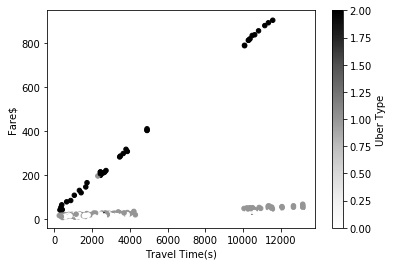

In [318]:
df1.plot.scatter(y='Fare$', x= 'Travel Time(s)', c='Uber Type')           #plot of Fare, Time grouped by Uber Type

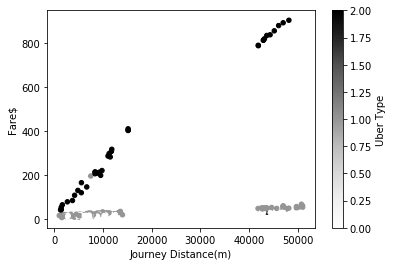

In [319]:
df1.plot.scatter(y='Fare$', x= 'Journey Distance(m)', c='Uber Type')       #plot of Fare, Distance grouped by Uber Type

By looking at the above plots, we can concur that the Fare$ is also linearly dependent on:
* Travel Time(s)
* Journey Distance(m)

Hence to predict the Fare$, we can use Linear Regression

In [320]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

For regression, we need to train the model. To train this model, we append our cleaned dataset from the previous section to the missing values dataset.

In [ ]:
missing_df = pd.read_csv('29812135_missing_value.csv')             #importing files
clean_df = pd.read_csv(r'29812135_dirty_data_solution.csv')
train_df = clean_df.append(missing_df,ignore_index=True)           #appending the 2 dataframes
train_df

In the missing_values.csv file, there are missing values in the Uber Type and Fare$ columns.

In [322]:
missing_df.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3361790798,1.0,7,5,-37.861835,144.905716,-37.799643,144.926002,12103.0,2018-04-04,23:09:49,3844.80,0:13:53,32.36
1,ID3781689896,1.0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-06-16,02:48:48,13173.36,6:28:21,71.08
2,ID1561388474,0.0,1,7,-37.812315,144.962643,-37.861835,144.905716,8256.0,2018-07-05,19:56:48,2840.16,20:44:08,11.65
3,ID1236554203,0.0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-01-15,16:58:51,5320.68,18:27:31,14.29
4,ID1945845392,NaN,5,4,-37.808741,144.934839,-37.811866,145.013041,8763.0,2018-05-28,03:12:04,2192.82,3:48:36,14.75


### 4.1.2 Imputing Uber Type:

By observing the above dataframe, We can concur that:

Uber type 0 has ID starting with 1

Uber type 1 has ID starting with 3

Uber type 2 has ID starting with 5

Hence, We fill in the missing values

In [323]:
i = 0
for each in missing_df['Uber Type']:                         #adding uber type where the data is missing 
    if each != 0 or each!=1 or each!= 2:
        if missing_df['Unnamed: 0'][i][2] == '1':
            missing_df['Uber Type'][i] = 0
        if missing_df['Unnamed: 0'][i][2] == '3':
            missing_df['Uber Type'][i] = 1
        if missing_df['Unnamed: 0'][i][2] == '5':
            missing_df['Uber Type'][i] = 2
    i = i + 1

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


We know that Uber classifies the departure time into 3 parts which are:
* Morning (0) - 6am to 11:59pm
* Afternoon (1) - 12pm - 8:59pm
* Night (2) - 9pm - 5:59am

We classify our dataset into these times of the day based on the Departure Time:

In [325]:
timeofday = []                                #checking whether departure time is morning, afternoon or night
for each in train_df['Departure Time']:
    each1 = pd.to_timedelta(each, unit='s')
    if 5 < each1.seconds//3600 <12:
        timeofday.append(0)
        #print(0)
    elif 11 < each1.seconds//3600 <21:
        timeofday.append(1)
        #print(1)
    else:
        timeofday.append(2)
        #print(2)

Adding the new column to our Dataframe

In [326]:
train_df['timeofday'] = timeofday                #add to dataframe

We know that Uber classifies the days into 2 categories which are:
* Weekdays
* Weekends

We have not been given the days of the week. Hence we find wha day it is by using the Departure date:

If it is a weekend, we assign value 1
If it is a weekday, we assign value 0

In [327]:
dayofweek = []                                          #check if departure date is weekday or weekend
i = 0
for each in train_df['Departure Date']:
    each = pd.to_datetime(each)
    #print(each.weekday_name)
    if each.weekday_name == 'Saturday' or each.weekday_name == 'Sunday':
        dayofweek.append(1)
        #df2['dayofweek'][i] == 1
    else:
        dayofweek.append(0)
        #df2['dayofweek'][i] == 0

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [328]:
train_df['dayofweek'] = dayofweek             #adding to dataset

As regression can not be done when there are null values present in the data, we drop the null values

In [330]:
not_nulls = train_df.dropna()             #dropping all the missing values from our dataset

Slicing the data on the basis of Uber Type to predict the Fares individually

In [332]:
uber_type_0 = not_nulls[not_nulls['Uber Type'] == 0]            #slicing the dataframe on basis of Uber Type
uber_type_1 = not_nulls[not_nulls['Uber Type'] == 1]
uber_type_2 = not_nulls[not_nulls['Uber Type'] == 2]

Now we need to create a dataframe which has only the null values, which we have to predict

In [334]:
null_df = train_df[train_df['Fare$'].isnull()]                  #adding null data to another dataframe

Now we split the dataset into 3 datasets according to the Uber Type

In [336]:
null_uber_type_0 = null_df[null_df['Uber Type'] == 0]             #slicing the dataframe with missing values by Uber Type
null_uber_type_1 = null_df[null_df['Uber Type'] == 1]
null_uber_type_2 = null_df[null_df['Uber Type'] == 2]

Now we perform Linear Regression for Uber Type 0:

In [337]:
from sklearn import linear_model                                #Linear Regression for Uber Type 0
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(uber_type_0[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_0['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Therefore the predeicted values for the Fare for Uber Type 0 are:

In [338]:
predictor_uber_type_0 = regressor.predict(null_uber_type_0[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']])  #predicting values of Fare
predictor_uber_type_0

array([16.26815479, 29.83666746, 18.29747296, 17.49100351,  8.5651638 ,
       14.96940793, 19.9604697 , 10.64517858, 13.96394594, 14.34568407,
       10.23792057, 11.24247269, 11.24300171])

R score for this is:

In [339]:
regressor.score(uber_type_0[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_0['Fare$'])

0.9403587111927904

Now we perform Linear Regression for Uber Type 1:

In [340]:
regressor = LinearRegression()          #Linear Regression for Uber Type 1
regressor.fit(uber_type_1[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_1['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Therefore the predicted values for Uber Type 1 are:

In [341]:
predictor_uber_type_1 = regressor.predict(null_uber_type_1[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']])
predictor_uber_type_1

array([55.14236103, 18.82490322, 54.07284506, 22.33514565, 19.59286051,
       48.32736694])

* We do not need to perform Regression for Uber Type 2 as there are no missing values for Uber Type 2

In [342]:
null_uber_type_0['Fare$'] = predictor_uber_type_0
null_uber_type_1['Fare$'] = predictor_uber_type_1

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [343]:
unnamed_uber_type_0 = []
for each in null_uber_type_0['Unnamed: 0']:
    unnamed_uber_type_0.append(each)
unnamed_uber_type_1 = []
for each in null_uber_type_1['Unnamed: 0']:
    unnamed_uber_type_1.append(each)

In [344]:
i = 0                                                          #imputing the predicted values where the values are missing
j = 0
for each in missing_df['Unnamed: 0']:
    if each == unnamed_uber_type_0[j]:
        missing_df['Fare$'][i] = predictor_uber_type_0[j]
        if j < len(unnamed_uber_type_0) - 1:
            j = j + 1
    i = i + 1
    
a = 0
b = 0
for each in missing_df['Unnamed: 0']:
    if each == unnamed_uber_type_1[b]:
        missing_df['Fare$'][a] = predictor_uber_type_1[b]
        if b < len(unnamed_uber_type_1) - 1:
            b = b + 1
    a = a + 1

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Exporting to csv file:

In [346]:
missing_df.to_csv(r'29812135_missing_value_solution.csv',index=False)           #exporting to output file

# 5. Outlier Detection:

In the outliers.csv we have been given data about Uber rides which have outliers in the Fare.

Our objective is to clean the data by removing outliers.

Importing the outlier file and creating a dataframe:

In [ ]:
outlierss = pd.read_csv('29812135_outliers.csv',index_col='Unnamed: 0')            #importing files
outlierss.rename(columns={'Unnamed: 0.1':'Unnamed: 0'}, inplace=True)
outlierss

As we have to predict the fare for outliers file like we did for the missing data above, we will need to create columns for whether the day is a weekend or a weekday and another column for time of the day

Adding Time of day column:

In [348]:
timeofday = []                                      #checking if time is morning, afternoon or night
for each in outlierss['Departure Time']:
    each1 = pd.to_timedelta(each, unit='s')
    if 5 < each1.seconds//3600 <12:                 #converting seconds to hours
        timeofday.append(0)
        #print(0)
    elif 11 < each1.seconds//3600 <21:
        timeofday.append(1)
        #print(1)
    else:
        timeofday.append(2)
        #print(2)

outlierss['timeofday'] = timeofday

Adding day of week column:

In [349]:
dayofweek = []                                                #checking if date is weekend or weekday
i = 0
for each in outlierss['Departure Date']:
    each = pd.to_datetime(each)
    if each.weekday_name == 'Saturday' or each.weekday_name == 'Sunday':
        dayofweek.append(1)
    else:
        dayofweek.append(0)        
outlierss['dayofweek'] = dayofweek

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """


Now we slice the data on the basis of Uber Types. We will use these slices later to remove the outliers present

In [351]:
only_outliers_data = outlierss                                 #slicing on basis of Uber Type
only_uber_type_0 = outlierss[outlierss['Uber Type'] == 0]
only_uber_type_1 = outlierss[outlierss['Uber Type'] == 1]
only_uber_type_2 = outlierss[outlierss['Uber Type'] == 2]

Next, to perform Linear Regression to predict the Fare, we append the data from the missing values dataset and the dirty data dataset. 

We do this because more the data, better the predictions using Linear Regression.

In [ ]:
outliers = outlierss.append(not_nulls,sort=False)                 #appending missing and dirty data to outliers data
outliers

Now we slice this combined dataset on the basis of Uber Types:

In [353]:
o_uber_type_0 = outliers[outliers['Uber Type'] == 0]                   #slicing on basis of Uber Types
o_uber_type_1 = outliers[outliers['Uber Type'] == 1]
o_uber_type_2 = outliers[outliers['Uber Type'] == 2]

### 5.1 Predicting Fare for Uber Type 0:

In [354]:
regressor = LinearRegression()                     #Linear Regression for Uber Type 0
regressor.fit(uber_type_0[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_0['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [355]:
pred_0 = regressor.predict(o_uber_type_0[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']])   #predicting values

Adding column for predicted fare in our dataset:

In [356]:
o_uber_type_0['Pred_fare'] = pred_0          #adding values to our dataframe

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


R score is:

In [357]:
regressor.score(uber_type_0[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_0['Fare$'])

0.9403587111927904

Now, we calculate the difference between the given Fare and the Predicted Fare and store it in another column:

In [ ]:
o_uber_type_0['Fare_diff'] = o_uber_type_0['Pred_fare'] - o_uber_type_0['Fare$']
o_uber_type_0

Now, we plot a boxplot for the fare difference:

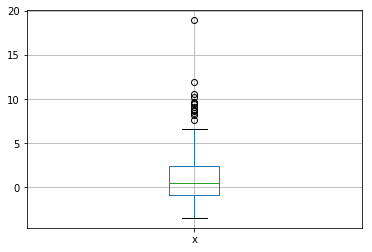

In [394]:
bp = pd.DataFrame.boxplot(o_uber_type_0['Fare_diff'], return_type='dict')                         #boxplot for Uber Type 0
whiskers_type_0 = [whiskers_type_0.get_ydata() for whiskers_type_0 in bp["whiskers"]]

The above plot shows us the distribution of our Fare difference.

The outliers can be clearly seen from the plot. The outliers are points:
* Above the Upper Whisker
* Below the Lower Whisker

Hence to remove these outliers, we need to find the value of these whiskers.

In [360]:
whiskers_type_0_lower = whiskers_type_0[0][1]                   #Finding values of whiskers
whiskers_type_0_upper = whiskers_type_0[1][1]
print(whiskers_type_0_upper, whiskers_type_0_lower)

6.570169649855221 -3.484644300799692


Now we know the outliers which are present in the data which contains dirty, missing, outlier data.

Hence, we need to find out which of these outliers are actually present in the outlier data.

Therefore, we need to predict the fare for only the outlier data and then find out the fare difference i.e. the Residual Fare.

To do this, we will use the outlier data slices we made above on the basis of Uber Types.

In [361]:
regressor = LinearRegression()                          #predicting data for outliers for uer type 0
regressor.fit(uber_type_0[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_0['Fare$'])
pred_0_final = regressor.predict(only_uber_type_0[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']])
only_uber_type_0['Pred_fare'] = pred_0_final
only_uber_type_0['Fare_diff'] = only_uber_type_0['Pred_fare'] - only_uber_type_0['Fare$']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now we have the data for our target dataset for which we need to remove the outliers.

* From the above Boxplot, we can see that the outliers are only present above the upper whisker. There are no outliers below the lower whisker

Hence, we will look for the rows which have fare difference which is higher than our Upper Whisker:

In [ ]:
only_uber_type_0[only_uber_type_0['Fare_diff'] > whiskers_type_0_upper]         #checking if outliers present in data

Now, we drop the above rows

In [364]:
only_uber_type_0 = only_uber_type_0[only_uber_type_0['Fare_diff'] < whiskers_type_0_upper]           #dropping the rows with outliers

Cleaned Uber Type 0 data is:

Residual Plot:

In [ ]:
only_uber_type_0

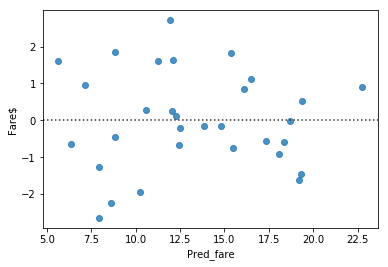

In [366]:
sns.residplot(x=only_uber_type_0['Pred_fare'],y=only_uber_type_0['Fare$'])             

Scatter plot:

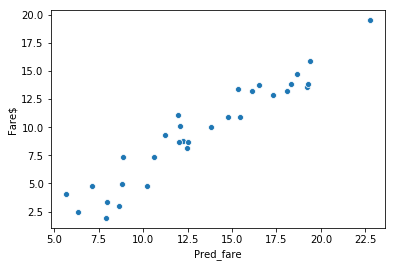

In [367]:
sns.scatterplot(x=only_uber_type_0['Pred_fare'],y=only_uber_type_0['Fare$'])

### 5.2 Uber Type 1

#### We repeat the same steps we used for Uber Type 0 on Uber Type 1



#### Predicting Fare for Uber Type 1

And adding column for Residual Fare

In [368]:
regressor = LinearRegression()                      #Linear regression for uber type 1
regressor.fit(uber_type_1[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_1['Fare$'])
pred_1 = regressor.predict(o_uber_type_1[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']])
o_uber_type_1['Pred_fare'] = pred_1
o_uber_type_1['Fare_diff'] = o_uber_type_1['Pred_fare'] - o_uber_type_1['Fare$']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Plotting the boxplot:

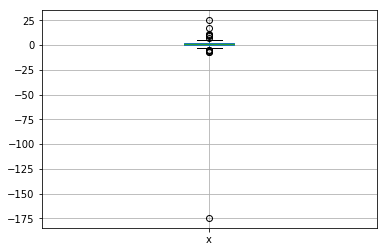

In [369]:
bp = pd.DataFrame.boxplot(o_uber_type_1['Fare_diff'], return_type='dict')               #boxplot for uber type 1
whiskers_type_1 = [whiskers_type_1.get_ydata() for whiskers_type_1 in bp["whiskers"]]

Finding out the Upper and Lower whiskers:

In [370]:
whiskers_type_1_lower = whiskers_type_1[0][1]               #finding values of the whiskers
whiskers_type_1_upper = whiskers_type_1[1][1]

In [371]:
whiskers_type_1_lower, whiskers_type_1_upper

(-3.247293940044699, 5.551403448914126)

Performing Linear Regression on Uber Type 1 data present in the outliers and getting the Residual Fare:

In [372]:
regressor = LinearRegression()                           #Regression for outlier data
regressor.fit(uber_type_1[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_1['Fare$'])
pred_1_final = regressor.predict(only_uber_type_1[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']])
only_uber_type_1['Pred_fare'] = pred_1_final
only_uber_type_1['Fare_diff'] = only_uber_type_1['Pred_fare'] - only_uber_type_1['Fare$']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Finding the outliers:

In [373]:
only_uber_type_1[only_uber_type_1['Fare_diff'] > whiskers_type_1_upper]          #checking if outliers present

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,timeofday,dayofweek,Pred_fare,Fare_diff
4,ID3465430616,1,5,3,-37.804982,144.936597,-37.818783,144.983814,5218.0,2018-06-18,08:15:05,1325.88,8:37:10,4.590,0,0,12.245753,7.655753
17,ID3801967282,1,8,9,-37.807202,145.026637,-38.110916,144.654173,49777.0,2018-03-13,09:52:17,12069.78,13:13:26,23.600,0,0,48.731587,25.131587
26,ID3518189560,1,1,3,-37.815952,144.973190,-37.823266,144.993752,2214.0,2018-02-03,02:58:39,601.38,3:08:40,9.845,2,1,20.261841,10.416841
82,ID3848849826,1,3,8,-37.815514,144.973826,-37.807202,145.026637,5642.0,2018-01-06,03:54:29,1391.34,4:17:40,11.665,2,1,22.834571,11.169571
83,ID3266532705,1,3,5,-37.816199,144.976384,-37.799839,144.926523,5548.0,2018-07-01,18:31:09,1332.72,18:53:21,8.765,1,1,18.285946,9.520946


Removing the outliers:

In [374]:
only_uber_type_1 = only_uber_type_1[only_uber_type_1['Fare_diff'] < whiskers_type_1_upper]       #removing outliers

Cleaned Uber Type 2 outliers data:

Residual plot:

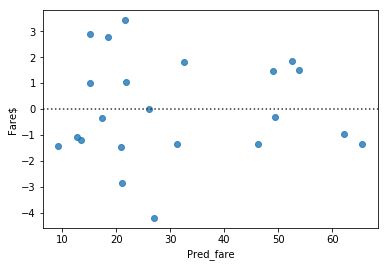

In [376]:
sns.residplot(x=only_uber_type_1['Pred_fare'],y=only_uber_type_1['Fare$'])

Scatter plot:

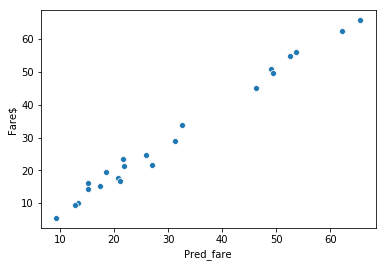

In [377]:
sns.scatterplot(x=only_uber_type_1['Pred_fare'],y=only_uber_type_1['Fare$'])

### 5.3 Uber Type 2:

#### We repeat the same steps we used for Uber Type 0 and Uber Type 1

### Predicting Fare for Uber Type 2

And adding column for Residual Fare

In [378]:
regressor = LinearRegression()                #Linear regression for uber type 2
regressor.fit(uber_type_2[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_2['Fare$'])
pred_2 = regressor.predict(o_uber_type_2[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']])
o_uber_type_2['Pred_fare'] = pred_2
regressor.score(uber_type_2[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_2['Fare$'])
o_uber_type_2['Fare_diff'] = o_uber_type_2['Pred_fare'] - o_uber_type_2['Fare$']
#o_uber_type_2['Fare_diff'] = o_uber_type_2['Fare$'] - o_uber_type_2['Pred_fare']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Plotting the boxplot:

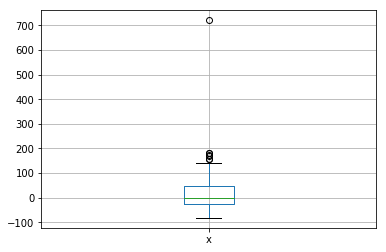

In [379]:
bp = pd.DataFrame.boxplot(o_uber_type_2['Fare_diff'], return_type='dict')                 #boxplot for uber type 2
whiskers_type_2 = [whiskers_type_2.get_ydata() for whiskers_type_2 in bp["whiskers"]]

Finding out the whiskers:

In [380]:
whiskers_type_2_lower = whiskers_type_2[0][1]     #finding values of whiskers
whiskers_type_2_upper = whiskers_type_2[1][1]

In [381]:
whiskers_type_2_lower, whiskers_type_2_upper

(-82.6382398137473, 142.22443528350493)

Performing Linear Regression on Uber Type 2 data present in the outliers and getting the Residual Fare:

In [382]:
regressor = LinearRegression()           #predicting values for outliers
regressor.fit(uber_type_2[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']],uber_type_2['Fare$'])
pred_2_final = regressor.predict(only_uber_type_2[['Journey Distance(m)','timeofday','dayofweek','Travel Time(s)']])
only_uber_type_2['Pred_fare'] = pred_2_final
only_uber_type_2['Fare_diff'] = only_uber_type_2['Pred_fare'] - only_uber_type_2['Fare$']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Finding the Outliers:

In [383]:
only_uber_type_2[only_uber_type_2['Fare_diff'] > whiskers_type_2_upper]          #checking for outliers

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,timeofday,dayofweek,Pred_fare,Fare_diff
5,ID5583176410,2,6,9,-37.787433,144.980377,-38.110916,144.654173,47033.0,2018-03-17,19:55:34,11350.50,23:04:44,687.10,1,1,855.644640,168.544640
34,ID5611904641,2,5,9,-37.803772,144.938021,-38.110916,144.654173,43640.0,2018-03-17,19:54:46,10481.46,22:49:27,635.94,1,1,792.257614,156.317614
40,ID5566785437,2,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-02-23,05:53:16,13173.36,9:32:49,795.55,2,0,967.411010,171.861010
46,ID5645565851,2,1,9,-37.799530,144.955140,-38.110916,144.654173,44157.0,2018-01-14,17:40:12,10623.24,20:37:15,644.30,1,1,802.843740,158.543740
76,ID5897922822,2,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-06-09,03:31:47,12681.06,7:03:08,774.04,2,1,956.413499,182.373499


Deleting the Outliers:

In [384]:
only_uber_type_2 = only_uber_type_2[only_uber_type_2['Fare_diff'] < whiskers_type_2_upper]   #deleting outliers

Below is the cleaned Uber Type 2 data without outliers:

In [ ]:
only_uber_type_2

Scatter plot:

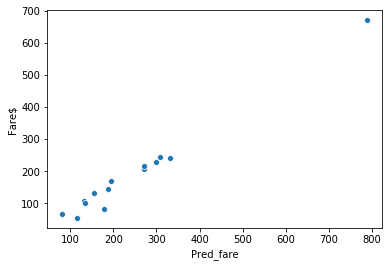

In [386]:
sns.scatterplot(x=only_uber_type_2['Pred_fare'],y=only_uber_type_2['Fare$'])

#### Now we have cleaned data without outliers for each Uber Type. 

We merge these 3 slices together to form the final required dataset without the outliers:

Merging for Uber Type 0 and 1

In [ ]:
only_uber_type_0['new index']=list(only_uber_type_0.index)                 #merging the slices
only_uber_type_1['new index']=list(only_uber_type_1.index)
only_uber_type_2['new index']=list(only_uber_type_2.index)

df_merge = pd.merge(only_uber_type_0,only_uber_type_1,how='outer')
df_merge.sort_values(by=['new index'])

Merging for the merged 0 and 1 and Uber Type 2

In [388]:
s_final = pd.merge(df_merge,only_uber_type_2,how='outer')
final = s_final.sort_values(by=['new index'])

Dropping the columns which are not required:

In [389]:
final = final.drop(columns=['new index','timeofday','dayofweek','Pred_fare','Fare_diff'])     #dropping unwanted columns

Exporting the dataframe to our output file:

In [390]:
final.to_csv(r'29812135_outliers_solution.csv',index=False)                  #exporting final file

# CONCLUSION

* In dirty data we cleaned the data by performing the appropriate EDA.
* Finding errors in the dirty data was easier with the help of EDA.
* In missing values, with the help of EDA we first found out that the Fare was linearly dependent on other factors. Hence, Linear Regression was done and the missing values were imputed.
* For outliers, we took the missing and dirty data as training dat and trained the model to get the predicted fare.
* Then we removed the outliers with the help of EDA.